In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
# from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import r_regression

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv',index_col=0)
ratings.head()

,NAME,Year,PTS,UTS,DTS,ATS,MTS,PPM,MPM,PAC,UAC,DAC,AAC,MAC,PSR,USR,DSR,ASR,MSR
Timestamp,,,,,,,,,,,,,,,,,,,
22-04-2024 22:07,Pavithra,2nd,5,5,5,5,4,5,5,Excellent teaching,Clear teaching,Explained lectures,Clear lectures,Good lecture,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:08,Jasmitha Manali,2nd year,5,5,5,4,4,5,5,Comments,Comments,Comments,Comments,Comments,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:14,Harish,2nd,4,1,3,5,2,4,5,Comments,Comments,other,Comments,Comments,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:16,Sheela,2nd,5,5,5,5,5,5,4,Comments,Comments,other,Comments,Comments,Yes,Yes,No,No,No
22-04-2024 22:16,Kiran,2nd,5,2,2,2,1,5,3,Comments,Comments,other,Comments,Comments,No,Yes,No,Yes,Yes


In [ ]:
ratings = ratings.fillna(0)
ratings.head()


,NAME,Year,PTS,UTS,DTS,ATS,MTS,PPM,MPM,PAC,UAC,DAC,AAC,MAC,PSR,USR,DSR,ASR,MSR
Timestamp,,,,,,,,,,,,,,,,,,,
22-04-2024 22:07,Pavithra,2nd,5,5,5,5,4,5,5,Excellent teaching,Clear teaching,Explained lectures,Clear lectures,Good lecture,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:08,Jasmitha Manali,2nd year,5,5,5,4,4,5,5,Comments,Comments,Comments,Comments,Comments,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:14,Harish,2nd,4,1,3,5,2,4,5,Comments,Comments,other,Comments,Comments,Yes,Yes,Yes,Yes,Yes
22-04-2024 22:16,Sheela,2nd,5,5,5,5,5,5,4,Comments,Comments,other,Comments,Comments,Yes,Yes,No,No,No
22-04-2024 22:16,Kiran,2nd,5,2,2,2,1,5,3,Comments,Comments,other,Comments,Comments,No,Yes,No,Yes,Yes


Text(0, 0.5, 'Rating')

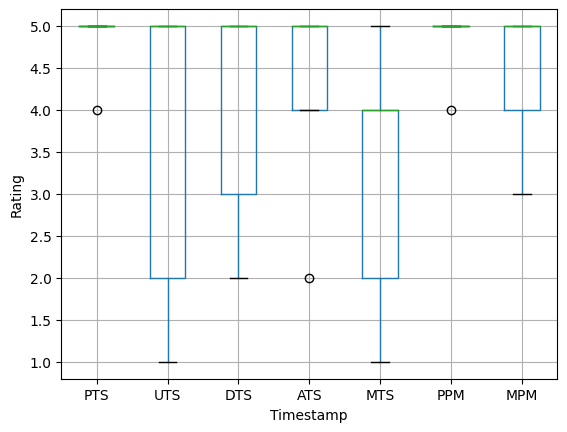

In [ ]:
ratings.head().boxplot()
plt.xlabel('Timestamp')
plt.ylabel('Rating')

In [ ]:
import pandas as pd

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv', index_col=0)

# Convert non-numeric values to numeric values
ratings.iloc[:, 3:] = ratings.iloc[:, 3:].apply(pd.to_numeric, errors='coerce')

# Function to standardize each row
def standardize(row):
    try:
        new_row = ((row - row.mean()) / (row.max() - row.min()))
    except ZeroDivisionError:
        new_row = row
    return new_row

# Apply the standardize function to the relevant columns
ratings_std = ratings.iloc[:, 3:].apply(standardize, axis=1)
ratings_std.head(5)


,UTS,DTS,ATS,MTS,PPM,MPM,PAC,UAC,DAC,AAC,MAC,PSR,USR,DSR,ASR,MSR
Timestamp,,,,,,,,,,,,,,,,
22-04-2024 22:07,0.166667,0.166667,0.166667,-0.833333,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-04-2024 22:08,0.333333,0.333333,-0.666667,-0.666667,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-04-2024 22:14,-0.583333,-0.083333,0.416667,-0.333333,0.166667,0.416667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-04-2024 22:16,0.166667,0.166667,0.166667,0.166667,0.166667,-0.833333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-04-2024 22:16,-0.125000,-0.125000,-0.125000,-0.375000,0.625000,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-12-60ba9a46acdb>:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


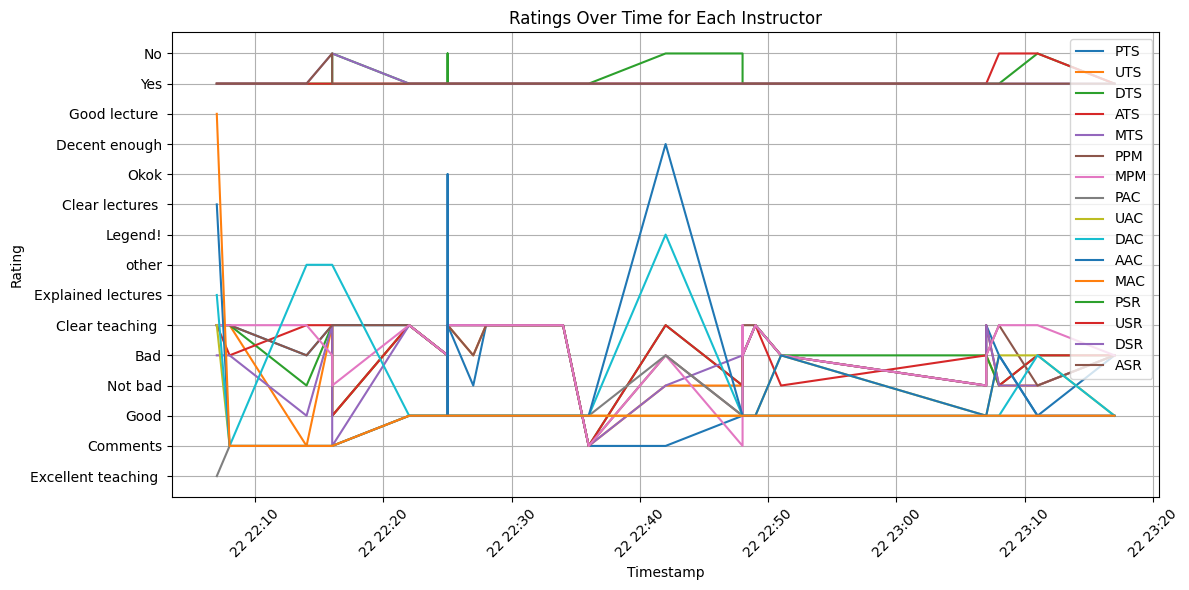

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from the file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv')

# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract unique instructors
instructors = df.columns[3:-1]

# Plot ratings over time for each instructor
plt.figure(figsize=(12, 6))
for instructor in instructors:
    instructor_df = df[['Timestamp', instructor]].dropna()
    plt.plot(instructor_df['Timestamp'], instructor_df[instructor], label=instructor)

plt.title('Ratings Over Time for Each Instructor')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s

# Display the modified DataFrame
cos_item_similarity_df.head()


,UTS,DTS,ATS,MTS,PPM,MPM,PAC,UAC,DAC,AAC,MAC,PSR,USR,DSR,ASR,MSR
UTS,10.000000,9.887705,9.743419,9.916493,9.758483,9.700595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DTS,9.887705,10.000000,9.933509,9.887705,9.811377,9.825560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATS,9.743419,9.933509,10.000000,9.822957,9.783843,9.834413,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MTS,9.916493,9.887705,9.822957,10.000000,9.679467,9.661558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PPM,9.758483,9.811377,9.783843,9.679467,10.000000,9.862206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Display the column names in the dataset
print(ratings.columns)


Index(['NAME', 'Year', 'PTS', 'UTS', 'DTS', 'ATS', 'MTS', 'PPM', 'MPM', 'PAC',
       'UAC', 'DAC', 'AAC', 'MAC', 'PSR', 'USR', 'DSR', 'ASR', 'MSR'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s

# Print each column of the DataFrame
for column in cos_item_similarity_df.columns:
    print(cos_item_similarity_df[column])


UTS    10.000000
DTS     9.887705
ATS     9.743419
MTS     9.916493
PPM     9.758483
MPM     9.700595
PAC     0.000000
UAC     0.000000
DAC     0.000000
AAC     0.000000
MAC     0.000000
PSR     0.000000
USR     0.000000
DSR     0.000000
ASR     0.000000
MSR     0.000000
Name: UTS, dtype: float64
UTS     9.887705
DTS    10.000000
ATS     9.933509
MTS     9.887705
PPM     9.811377
MPM     9.825560
PAC     0.000000
UAC     0.000000
DAC     0.000000
AAC     0.000000
MAC     0.000000
PSR     0.000000
USR     0.000000
DSR     0.000000
ASR     0.000000
MSR     0.000000
Name: DTS, dtype: float64
UTS     9.743419
DTS     9.933509
ATS    10.000000
MTS     9.822957
PPM     9.783843
MPM     9.834413
PAC     0.000000
UAC     0.000000
DAC     0.000000
AAC     0.000000
MAC     0.000000
PSR     0.000000
USR     0.000000
DSR     0.000000
ASR     0.000000
MSR     0.000000
Name: ATS, dtype: float64
UTS     9.916493
DTS     9.887705
ATS     9.822957
MTS    10.000000
PPM     9.679467
MPM     9.661558
PAC 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define your dataset
dataset = [
    [5, 5, 5, 5, 4, 5, 5],
    [5, 5, 5, 4, 4, 5, 5],
    [4, 1, 3, 5, 2, 4, 5],
    [5, 5, 5, 5, 5, 5, 4],
    [5, 2, 2, 2, 1, 5, 3],
    [5, 5, 5, 5, 5, 5, 5],
    [4, 4, 4, 4, 4, 4, 4],
    [3, 4, 3, 3, 3, 3, 4],
    [5, 5, 5, 5, 5, 5, 5],
    [3, 4, 5, 5, 5, 4, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [5, 5, 5, 5, 5, 5, 5],
    [1, 1, 1, 1, 1, 1, 1],
    [1, 3, 5, 5, 3, 4, 4],
    [2, 3, 3, 3, 4, 2, 1],
    [3, 4, 4, 4, 4, 4, 5],
    [4, 4, 4, 4, 4, 5, 4],
    [5, 5, 5, 5, 5, 5, 5],
    [4, 4, 4, 3, 4, 4, 4],
    [3, 3, 4, 4, 3, 3, 3],
    [5, 4, 4, 5, 5, 4, 4],
    [4, 3, 3, 3, 3, 5, 5],
    [2, 3, 4, 4, 3, 3, 5],
    [4, 4, 4, 4, 4, 4, 4]
]

# Convert the dataset to a numpy array
dataset = np.array(dataset)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(dataset)

# Print the cosine similarity matrix
print(cosine_sim)


[[1.         0.99729124 0.93474327 0.9939759  0.90555514 0.9974149
  0.9974149  0.99064629 0.9974149  0.98045498 0.9974149  0.9974149
  0.9974149  0.9974149  0.9974149  0.9974149  0.9974149  0.94220434
  0.92564133 0.98862694 0.99488386 0.9974149  0.99225341 0.99064629
  0.98748343 0.97599949 0.96803371 0.9974149 ]
 [0.99729124 1.         0.92043474 0.99109689 0.91233778 0.99544001
  0.99544001 0.99135981 0.99544001 0.97456008 0.99544001 0.99544001
  0.99544001 0.99544001 0.99544001 0.99544001 0.99544001 0.92912757
  0.91860032 0.98666945 0.99398094 0.99544001 0.9969319  0.98226477
  0.98154627 0.97987747 0.96136273 0.99544001]
 [0.93474327 0.92043474 1.         0.91097861 0.9021098  0.9258201
  0.9258201  0.90722211 0.9258201  0.91968394 0.9258201  0.9258201
  0.9258201  0.9258201  0.9258201  0.9258201  0.9258201  0.90384447
  0.79259392 0.92722192 0.92783702 0.9258201  0.9063817  0.93048421
  0.92627675 0.9499312  0.9356674  0.9258201 ]
 [0.9939759  0.99109689 0.91097861 1.         0

In [ ]:
import pandas as pd

# Define the cos_similar_prof variable
cos_similar_prof = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Display the shape of cos_similar_prof
print(cos_similar_prof.shape)

# Display the first few rows of cos_similar_prof
print(cos_similar_prof.head())


(3, 2)
   A  B
0  1  4
1  2  5
2  3  6


**Trying Pearson Method Correlation**

In [ ]:
# Read the dataset from the file
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv', index_col=0)

# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)

# Compute Pearson correlation
pearson_item_similarity = numeric_ratings.corr(method='pearson')

# Convert to DataFrame and adjust scale for better visualization
pearson_item_similarity_df = pd.DataFrame(pearson_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = pearson_item_similarity_df.select_dtypes(include=[np.number]) * 10
pearson_item_similarity_df[s.columns] = s

pearson_item_similarity_df.head()


,UTS,DTS,ATS,MTS,PPM,MPM,PAC,UAC,DAC,AAC,MAC,PSR,USR,DSR,ASR,MSR
UTS,10.000000,8.519143,6.421386,8.973419,6.590733,5.872836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DTS,8.519143,10.000000,8.855403,8.519143,6.655327,7.084632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ATS,6.421386,8.855403,10.000000,7.577649,6.172180,7.236230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MTS,8.973419,8.519143,7.577649,10.000000,5.405882,5.321026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PPM,6.590733,6.655327,6.172180,5.405882,10.000000,7.642603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = ratings.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
cos_item_similarity = cosine_similarity(numeric_ratings.T)


In [ ]:
import numpy as np

# Convert to DataFrame and adjust scale for better visualization
cos_item_similarity_df = pd.DataFrame(cos_item_similarity, index=numeric_ratings.columns, columns=numeric_ratings.columns)
s = cos_item_similarity_df.select_dtypes(include=[np.number]) * 10
cos_item_similarity_df[s.columns] = s


In [ ]:
def get_cos_similar_prof(prof_name, student_rating):
    similar_score = cos_item_similarity_df[prof_name] * (student_rating - 2.5) * 4  # Scale for 100%
    similar_score = similar_score.sort_values(ascending=False)
    return similar_score


In [ ]:
# List of professors and their ratings
leslie_lover = [("UTS", 5),
                ("ATS", 3),
                ("DTS", 3)]

# Create an empty DataFrame to store recommendations
recommendations_df = pd.DataFrame()

# Generate recommendations for each professor
for prof, rating in leslie_lover:
    recommendations_df[prof] = get_cos_similar_prof(prof, rating)


In [ ]:
# Drop any rows with missing values
df.dropna(inplace=True)


In [ ]:
# Collaborative filtering method
def collaborative_filtering(df, user_name):
    # Filter dataframe to include only the user's ratings
    user_ratings = df[df.index == user_name].drop(columns=['Year'])

    # Calculate the mean ratings for each instructor
    instructor_means = df.groupby(df.index).mean()

    # Calculate similarity between the user and other students
    similarity = df.apply(lambda row: user_ratings.corrwith(row), axis=1)

    # Sort the similarity scores in descending order
    similarity_sorted = similarity.sort_values(ascending=False)

    # Get the top similar users
    top_similar_users = similarity_sorted.head(5)

    # Filter the dataframe to include ratings from top similar users
    similar_user_ratings = df.loc[top_similar_users.index]

    # Calculate weighted average ratings based on similarity scores
    weighted_ratings = similar_user_ratings.multiply(top_similar_users, axis=0).sum() / top_similar_users.sum()

    # Exclude the instructors the user has already rated
    unrated_instructors = weighted_ratings[user_ratings.isna().any()].dropna()

    # Sort the recommendations in descending order
    recommended_instructors = unrated_instructors.sort_values(ascending=False)

    return recommended_instructors


In [ ]:
print(df.dtypes)


Timestamp    datetime64[ns]
NAME                 object
Year                 object
PTS                   int64
UTS                   int64
DTS                   int64
ATS                   int64
MTS                   int64
PPM                   int64
MPM                   int64
PAC                  object
UAC                  object
DAC                  object
AAC                  object
MAC                  object
PSR                  object
USR                  object
DSR                  object
ASR                  object
MSR                  object
dtype: object


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column, df[column].unique())


NAME ['Pavithra ' 'Jasmitha Manali' 'Harish ' 'Sheela' 'Kiran'
 'Venna Divya Reddy ' 'Sathvik Guptha A ' 'T MAHENDRA BABU ' 'Hemanth '
 'Rohit ' 'Soundarya ' 'Ashika ' 'Tejaswani' 'Darun ' 'Likhil'
 'A. M. Harshitha' 'Divyanshu Singh' 'G Tarun ' 'Gangothri K C'
 'D LAKSHMI PRIYA ' 'N thanusha ' 'VALLABH' 'A Rohith Kumar' 'Dharun'
 'Sharma' 'Riya' 'K. Siva Nandini ']
Year ['2nd' '2nd year ']
PAC ['Excellent teaching ' 'Comments' 'Good' 'Not bad' 'Bad']
UAC ['Clear teaching ' 'Comments' 'Good' 'Bad']
DAC ['Explained lectures' 'Comments' 'other' 'Good' 'Legend!' 'Bad']
AAC ['Clear lectures ' 'Comments' 'Good' 'Okok' 'Decent enough' 'Bad']
MAC ['Good lecture ' 'Comments' 'Good']
PSR ['Yes' 'No']
USR ['Yes' 'No']
DSR ['Yes' 'No']
ASR ['Yes' 'No']
MSR ['Yes' 'No']


In [ ]:
# Extract the subheadings (column names)
subheadings = pearson_item_similarity_df.columns

# Print the subheadings
for subheading in subheadings:
    print(subheading)


UTS
DTS
ATS
MTS
PPM
MPM
PAC
UAC
DAC
AAC
MAC
PSR
USR
DSR
ASR
MSR


In [ ]:
# Filter out non-numeric values and convert to numeric, filling missing values with 0
numeric_ratings = df.iloc[:, 3:].apply(lambda x: pd.to_numeric(x, errors='coerce')).fillna(0)


In [ ]:
# Calculate Pearson correlation coefficients
pearson_corr = numeric_ratings.corr()


In [ ]:
def get_pearson_similar_prof(professor, rating):
    # Get Pearson correlation coefficients for the specified professor
    similar_prof = pearson_corr[professor]
    # Sort professors based on correlation coefficients
    similar_prof = similar_prof.sort_values(ascending=False)
    # Exclude the specified professor from the list
    similar_prof = similar_prof.drop(professor)
    return similar_prof


# **Trying Machine Learning Algorithms**

In [ ]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Teacher Feedback - Form responses 1.csv', index_col=0)

# Display the first few rows to understand the structure of the data
print(data.head())


                             NAME       Year  PTS  UTS  DTS  ATS  MTS  PPM  \
Timestamp                                                                    
22-04-2024 22:07        Pavithra         2nd    5    5    5    5    4    5   
22-04-2024 22:08  Jasmitha Manali  2nd year     5    5    5    4    4    5   
22-04-2024 22:14          Harish         2nd    4    1    3    5    2    4   
22-04-2024 22:16           Sheela        2nd    5    5    5    5    5    5   
22-04-2024 22:16            Kiran        2nd    5    2    2    2    1    5   

                  MPM                  PAC              UAC  \
Timestamp                                                     
22-04-2024 22:07    5  Excellent teaching   Clear teaching    
22-04-2024 22:08    5             Comments         Comments   
22-04-2024 22:14    5             Comments         Comments   
22-04-2024 22:16    4             Comments         Comments   
22-04-2024 22:16    3             Comments         Comments   

           

In [ ]:
import torch

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163008 sha256=3fc16fb052c8b649e5e0cfe624705666536eea3e79ad45c64a4e88f766be0942
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
from surprise import NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import cross_validate

***Non-Negative Matrix Factorisation Method Implementation***

***KNN Algorithm Implementation:***

In [ ]:
from surprise import KNNBasic
algo = KNNBasic()
cross_validate(algo, data, measures=['RMSE', 'MAE'],cv=5,verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.0698  0.0600  0.0474  0.0492  0.0976  0.0648  0.0183  
MAE (testset)     0.0035  0.0030  0.0013  0.0028  0.0051  0.0031  0.0012  
Fit time          0.01    0.02    0.02    0.01    0.02    0.02    0.00    
Test time         0.17    0.18    0.27    0.17    0.17    0.19    0.04    


{'fit_time': (0.011974096298217773,
  0.016121864318847656,
  0.01509857177734375,
  0.012859821319580078,
  0.02047586441040039),
 'test_mae': array([0.00353548, 0.00301685, 0.00128942, 0.00276363, 0.00507402]),
 'test_rmse': array([0.06975315, 0.05997684, 0.047358  , 0.04921564, 0.09763054]),
 'test_time': (0.16951751708984375,
  0.18103790283203125,
  0.2654561996459961,
  0.17008447647094727,
  0.17263245582580566)}

***Singluar Value Decomposition Implementation***

In [ ]:
from surprise import SVD
algo = SVD()
cross_validate(algo, data, measures=['RMSE','MAE'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.1792  0.1679  0.1822  0.1777  0.1781  0.1770  0.0048  
MAE (testset)     0.0959  0.0922  0.0972  0.0924  0.0983  0.0952  0.0025  
Fit time          1.01    1.10    0.98    1.22    2.07    1.27    0.40    
Test time         0.12    0.03    0.03    0.04    0.04    0.05    0.03    


{'fit_time': (1.0121300220489502,
  1.0982019901275635,
  0.975663423538208,
  1.221648931503296,
  2.0666513442993164),
 'test_mae': array([0.09592421, 0.09218976, 0.09715717, 0.09243315, 0.0982826 ]),
 'test_rmse': array([0.17915837, 0.16791067, 0.18215573, 0.17768694, 0.17812808]),
 'test_time': (0.11962652206420898,
  0.025217056274414062,
  0.027360200881958008,
  0.04417586326599121,
  0.04382944107055664)}

***Plotting Comparsion between KNN and NVM***

In [ ]:
import matplotlib.pyplot as plt

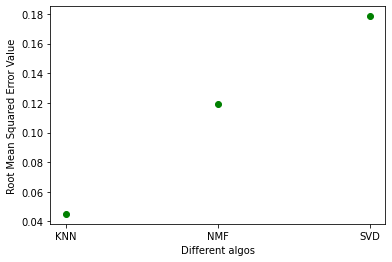

In [ ]:
rmse = [0.0451, 0.1193,0.1784]
algos = ['KNN','NMF','SVD']
plt.plot(algos, rmse, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Root Mean Squared Error Value")
plt.show()

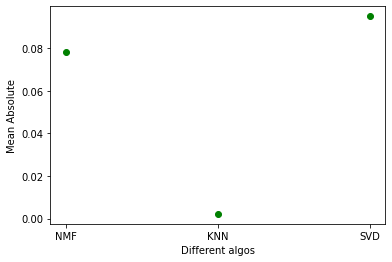

In [ ]:
mae = [0.0784, 0.0022 ,0.0951]
algos = ['NMF','KNN','SVD']
plt.plot(algos, mae, 'go',)
plt.xlabel("Different algos")
plt.ylabel("Mean Absolute")
plt.show()